# Loan Approver

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Note: The following data has been normalized between 0 and 1
data = Path('../Resources/loans.csv')
loan_status_df = pd.read_csv(data)
loan_status_df

,assets,liabilities,income,credit_score,mortgage,status
0,0.210859,0.452865,0.281367,0.628039,0.302682,deny
1,0.395018,0.661153,0.330622,0.638439,0.502831,approve
2,0.291186,0.593432,0.438436,0.434863,0.315574,approve
3,0.458640,0.576156,0.744167,0.291324,0.394891,approve
4,0.463470,0.292414,0.489887,0.811384,0.566605,approve
...,...,...,...,...,...,...
95,0.360945,0.823295,0.542451,0.224285,0.328504,approve
96,0.114420,0.107174,0.619564,0.370300,0.047719,deny
97,0.309276,0.692433,0.483730,0.328953,0.304493,approve
98,0.549153,0.301588,0.651869,0.717826,0.602004,approve


## Separate the Features (X) from the Target (y)

In [3]:
y = loan_status_df["status"]
X = loan_status_df.drop(columns="status")

## Split our data into training and testing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y, 
                                                    random_state=1,
                                                    stratify=y
                                                    )

## Create a Logistic Regression Classifier

In [5]:
classifier = LogisticRegression(random_state=1)


## Fit (train) or model using the training data

In [6]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

## Score the model using the test data

In [7]:
predictions = classifier.predict(X_test)


## Make predictions

In [9]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,deny,deny
1,deny,approve
2,deny,deny
3,approve,deny
4,deny,deny


# Confusion Matrix

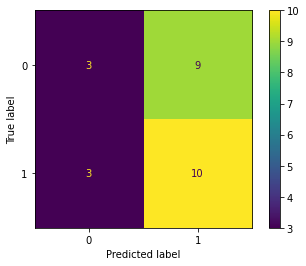

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_plot = confusion_matrix(y_test, predictions)
cm_plot
ConfusionMatrixDisplay(cm_plot).plot()

# Classification Report

In [11]:
target_names = ["Denied", "Approved"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

      Denied       0.50      0.25      0.33        12
    Approved       0.53      0.77      0.62        13

    accuracy                           0.52        25
   macro avg       0.51      0.51      0.48        25
weighted avg       0.51      0.52      0.48        25



In [12]:
classifier.classes_


array(['approve', 'deny'], dtype=object)